In [14]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울공원요약.csv to 서울공원요약 (1).csv


In [5]:
park= pd.read_csv(filename)
park.head()

,공원명,지역,경도,위도,면적,분류,크기
0,남산도시자연공원,중구,126.990377,37.550140,2896887,대형,15
1,길동생태공원,강동구,127.154779,37.540394,80683,소형,3
2,서울대공원,과천시,127.019846,37.426449,9132690,대형,15
3,서울숲,성동구,127.041798,37.543072,480994,중형,7
4,월드컵공원,마포구,126.878907,37.571805,2284085,대형,15


### 1. 자치구역별 면적

In [16]:
df = park.groupby('지역')['면적'].agg(['sum','count'])
df

,sum,count
지역,,
강남구,3626398,7
강동구,1526390,7
강북구,3714902,4
강서구,2194154,9
과천시,9132690,1
관악구,10431453,2
광진구,584002,2
구로구,1617657,4
금천구,57568,4


In [17]:
df.drop(index='과천시', inplace=True)   # index가 '과천시'인 행을 지우는 코드
df.columns = ['공원면적','공원수']
df.head()

,공원면적,공원수
지역,,
강남구,3626398,7
강동구,1526390,7
강북구,3714902,4
강서구,2194154,9
관악구,10431453,2


2. 구별 공원면적 비율 및 인당 공원면적 비교

In [8]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울시인구.txt to 서울시인구 (1).txt


In [18]:
seoul_df = pd.read_csv(filename, sep='\t')
seoul_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
0,2020,합계,"9,911,088",605.23,"16,376"
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"


In [19]:
seoul_df.drop(index=0, inplace=True)
seoul_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"
5,2020,광진구,"360,109",17.06,"21,105"


In [20]:
seoul_df.set_index('지역', inplace=True)
seoul_df

,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
종로구,2020,"158,996",23.91,"6,649"
중구,2020,"134,635",9.96,"13,517"
용산구,2020,"244,645",21.87,"11,188"
성동구,2020,"300,505",16.86,"17,822"
광진구,2020,"360,109",17.06,"21,105"
동대문구,2020,"357,014",14.22,"25,114"
중랑구,2020,"399,562",18.50,"21,603"
성북구,2020,"447,056",24.58,"18,190"
강북구,2020,"311,569",23.60,"13,202"


In [21]:
df = df.join(seoul_df[['인구','면적']])     # df = pd.merge(df, seoul_df[['인구','면적']])
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,"544,055",39.50
강동구,1526390,7,"463,998",24.59
강북구,3714902,4,"311,569",23.60
강서구,2194154,9,"585,901",41.44
관악구,10431453,2,"509,803",29.57


In [22]:
df['면적'] = df.면적 * 1000000
df['인구'] = df.인구.apply(lambda x: int(x.replace(',','')))
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,544055,39500000.0
강동구,1526390,7,463998,24590000.0
강북구,3714902,4,311569,23600000.0
강서구,2194154,9,585901,41440000.0
관악구,10431453,2,509803,29570000.0


In [23]:
df['면적비율'] = df.공원면적 / df.면적 * 100
df['인당면적'] = df.공원면적 / df.인구
df.head()

,공원면적,공원수,인구,면적,면적비율,인당면적
지역,,,,,,
강남구,3626398,7,544055,39500000.0,9.180754,6.665499
강동구,1526390,7,463998,24590000.0,6.207361,3.289648
강북구,3714902,4,311569,23600000.0,15.741110,11.923208
강서구,2194154,9,585901,41440000.0,5.294773,3.744923
관악구,10431453,2,509803,29570000.0,35.277149,20.461733


* 자치구별 공원면적 비율

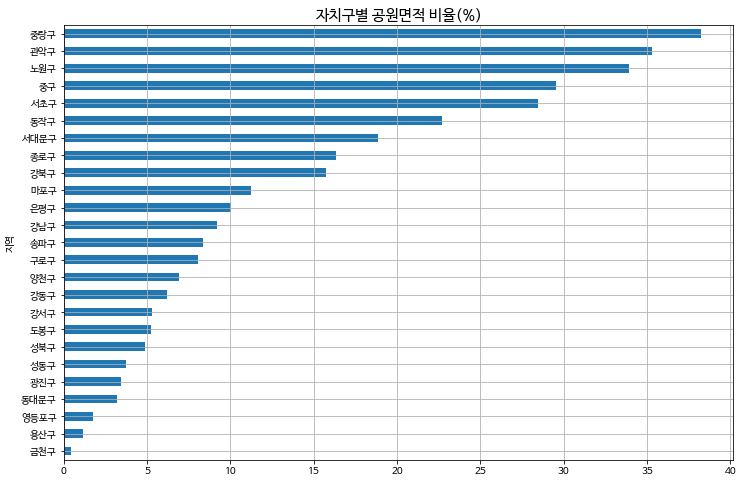

In [24]:
df.면적비율.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 공원면적 비율(%)', size=15)
plt.show()

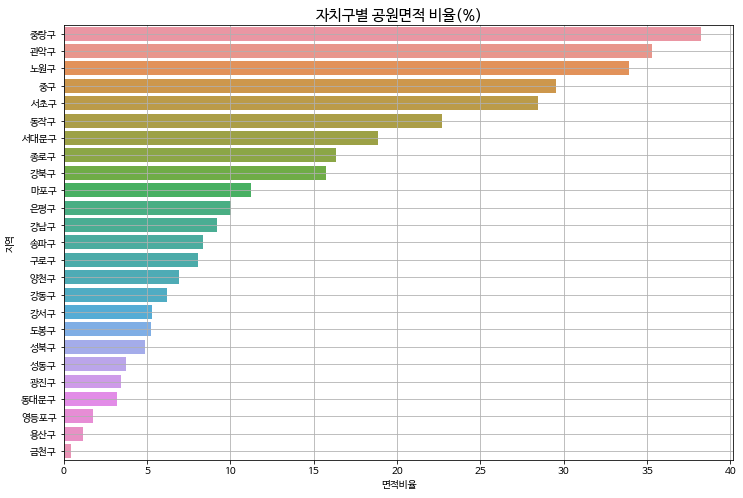

In [25]:
plt.figure(figsize=(12,8))
order = df.면적비율.sort_values(ascending=False).index
sns.barplot(x='면적비율', y=df.index, data=df, order=order)
plt.grid()
plt.title('자치구별 공원면적 비율(%)', size=15)
plt.show()

* 인당 공원 면적

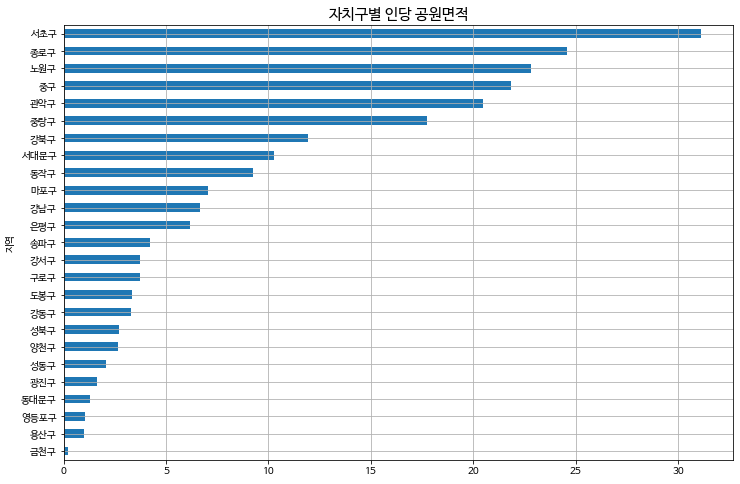

In [26]:
df.인당면적.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 인당 공원면적', size=15)
plt.show()

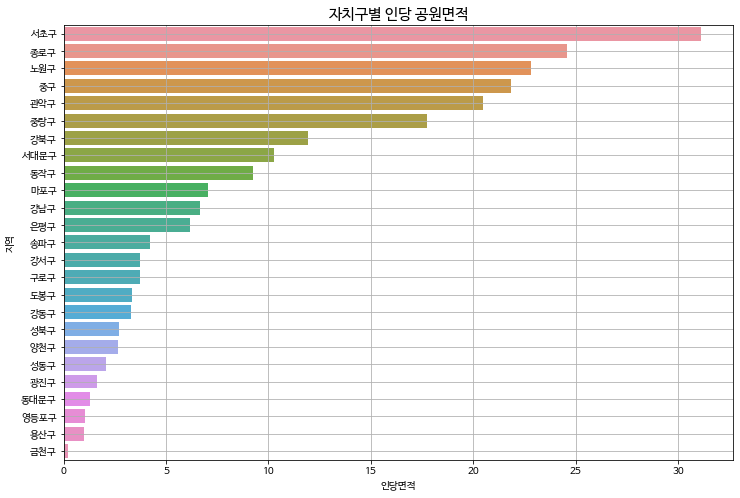

In [28]:
plt.figure(figsize=(12,8))
order = df.인당면적.sort_values(ascending=False).index
sns.barplot(x='인당면적', y=df.index, data=df, order=order)
plt.grid()
plt.title('자치구별 인당 공원면적', size=15)
plt.show()

In [29]:
df.to_csv('자치구별 공원 현황.csv')     # index=False 가 아님